# Markovian Model for steady-state throughput CUBIC and Hybla
Based on the paper by Bao Wong and Leung.

* First we try to just compute different stationnary distributions for CUBIC for different parameters. 
* Then we shall do the same with Hybla. 
* Then we can do the concatenation.

Along the way, we noticed that the model is not very realistic as it assumes a time based error model. However, errors are dependent on the number of packets sent. This is why we propose a new model.

## CUBIC Raw

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_OG, CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_Hybla_OG, CCA_MarkovChain_CUBIC_discrete
from ccaModels import CCA_StochasticModel_Hybla

#plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)

Average throughput is 812.284125972381


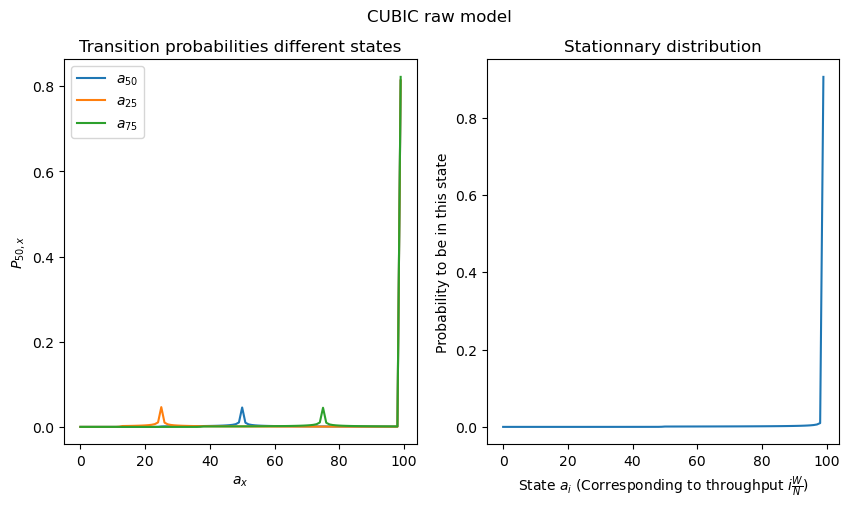

In [3]:
wired = CCA_MarkovChain_CUBIC_OG(err_rate=0.05,beta=0.5,alpha=1,N=100,C =1000)
wired.avg_throughput()
print(f"Average throughput is {wired.ssThroughput}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = "$a_{50}$")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "$a_{25}$")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = "$a_{75}$")
axs[0].set_title(r"Transition probabilities different states")
axs[0].set_ylabel(r"$P_{50,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle("CUBIC raw model")
plt.show()

Text(0, 0.5, 'Normalised throughput')

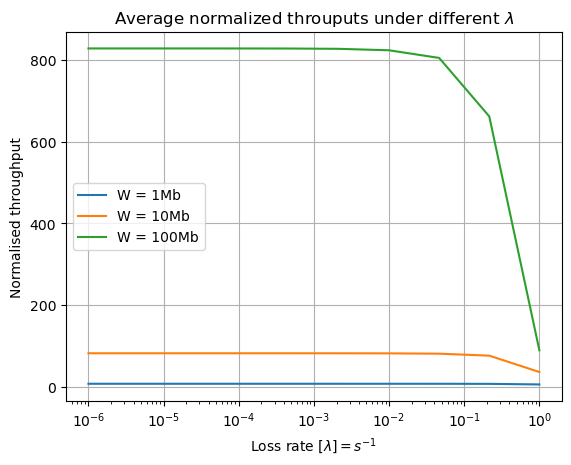

In [5]:
# Fig 7. from paper
err_rates = np.logspace(-6,0,10)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wired = CCA_MarkovChain_CUBIC_OG(err_rate=l,beta=0.5,alpha=1,N=100,C = C ,RTT_real=0.1)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(err_rates,throughputs[0,:], label = "W = 1Mb")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Average normalized throuputs under different $\lambda$")
plt.xlabel(r"Loss rate $[\lambda] = s^{-1}$")
plt.ylabel(r'Normalised throughput')

Text(0, 0.5, 'Normalised throughput')

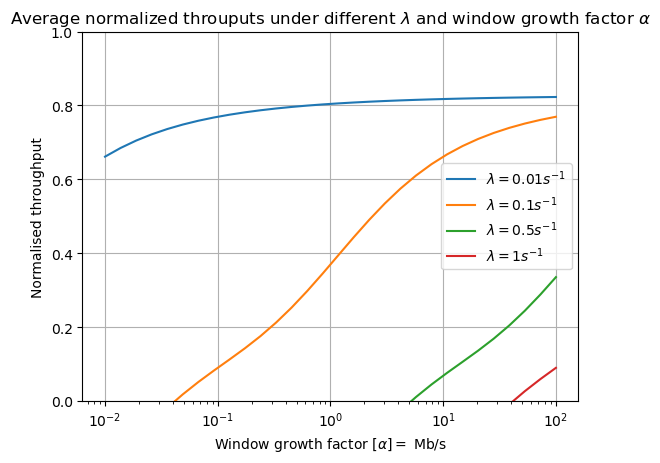

In [10]:
# Fig. 8 

alphas = np.logspace(-2,2,30)
throughputs = np.zeros([4,len(alphas)])
for k,lam in enumerate([0.01,0.1,0.5,1]):
    for i, alpha in enumerate(alphas):
        wired = CCA_CUBIC_MarkovChain(trans_err=lam,beta=0.5,alpha=alpha,N=100,C=100,RTT=100)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(alphas,throughputs[0,:], label = r"$\lambda = 0.01 s^{-1}$")
plt.plot(alphas,throughputs[1,:], label = r"$\lambda = 0.1 s^{-1}$")
plt.plot(alphas,throughputs[2,:], label = r"$\lambda = 0.5 s^{-1}$")
plt.plot(alphas,throughputs[3,:], label = r"$\lambda = 1 s^{-1}$")
plt.semilogx()
plt.legend()
plt.ylim([0,1])
plt.grid()
plt.title(r"Average normalized throuputs under different $\lambda$ and window growth factor $\alpha$")
plt.xlabel(r"Window growth factor $[\alpha] =$ Mb/s")
plt.ylabel(r'Normalised throughput')

In [11]:
fast = CCA_CUBIC_MarkovChain(trans_err=0.5,beta=0.5,alpha=1,N=100,C =100,RTT=0.025)
slow = CCA_CUBIC_MarkovChain(trans_err=0.5,beta=0.5,alpha=1,N=100,C =100,RTT=0.1)
print(fast.avg_throughput())
print(slow.avg_throughput())
print(fast.tau[99,99])
print(slow.tau[99,99])


0.7315465066033302
0.6425237057388398
0.783017208342889
1.242962340232705


## Hybla raw

Average throughput is 28207.671711610306


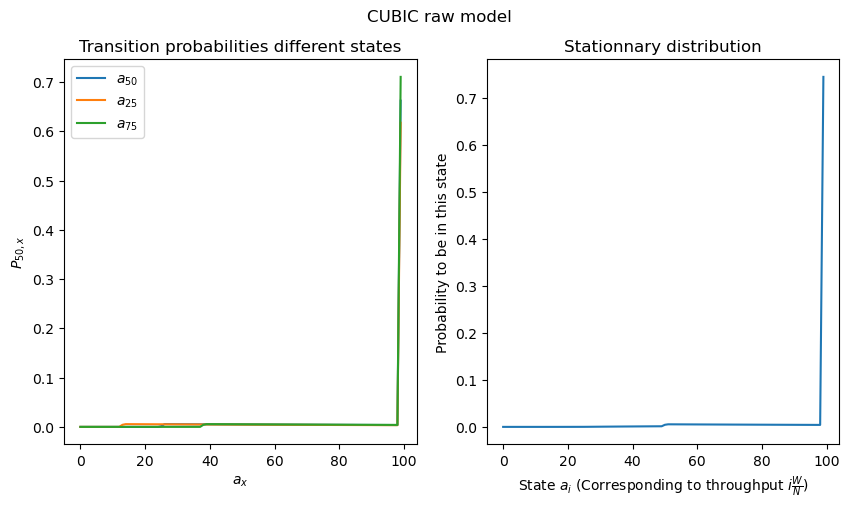

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_Hybla_OG

wired = CCA_MarkovChain_Hybla_OG(err_rate=0.9,beta=0.5,N=100,C =1000)
wired.avg_throughput()
print(f"Average throughput is {wired.ssThroughput}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = "$a_{50}$")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "$a_{25}$")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = "$a_{75}$")
axs[0].set_title(r"Transition probabilities different states")
axs[0].set_ylabel(r"$P_{50,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle("CUBIC raw model")
plt.show()

Text(0, 0.5, 'Normalised throughput')

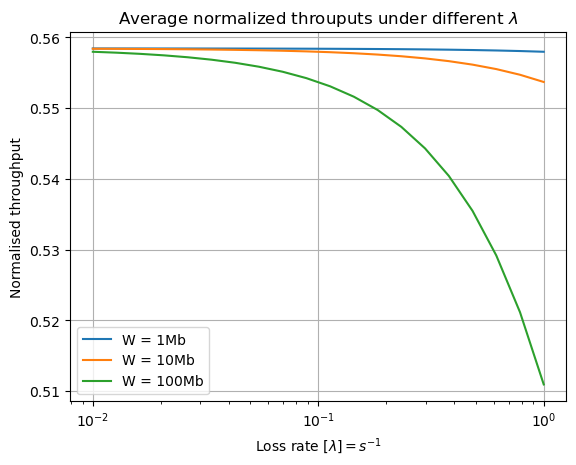

In [7]:
err_rates = np.logspace(-2,0,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wired = CCA_MarkovChain_Hybla_OG(err_rate=l,beta=0.5,N=100,C = C ,RTT_real=0.1)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(err_rates,throughputs[0,:], label = "W = 1Mb")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Hybla average normalized throuputs under different $\lambda$")
plt.xlabel(r"Loss rate $[\lambda] = s^{-1}$")
plt.ylabel(r'Normalised throughput')

In [13]:
wireless = CCA_Hybla_MarkovChain(trans_err=0.1,beta=0.5,alpha=1,N=100,C = 1000, RTT = 0.5, RTT0=0.025)
print(wireless.avg_throughput())
wired = CCA_CUBIC_MarkovChain(trans_err=0.1,beta=0.5,alpha=1,N=100,C =1000,RTT=0.5)
print(wired.avg_throughput())

0.4085971799296745
0.7081852900931365


In [34]:
err_rates = np.logspace(-2,0,20)
throughputs_hybla_bandwidth = np.zeros([3,len(err_rates)])
throughputs_cubic_bandwidth = np.zeros([3,len(err_rates)])
throughputs_hybla_rtt = np.zeros([3,len(err_rates)])
throughputs_cubic_rtt = np.zeros([3,len(err_rates)])

for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wireless = CCA_Hybla_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100, C = C, RTT=0.1, RTT0=0.025)
        throughputs_hybla_bandwidth[k,i] = wireless.avg_throughput()
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = C, RTT = 0.1)
        throughputs_cubic_bandwidth[k,i] = wired.avg_throughput()

for k,R in enumerate([0.025,0.1,0.6]):
    for i,l in enumerate(err_rates):
        wireless = CCA_Hybla_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100, C = 100, RTT=R, RTT0=0.025)
        throughputs_hybla_rtt[k,i] = wireless.avg_throughput()
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = 100, RTT = R)
        throughputs_cubic_rtt[k,i] = wired.avg_throughput()

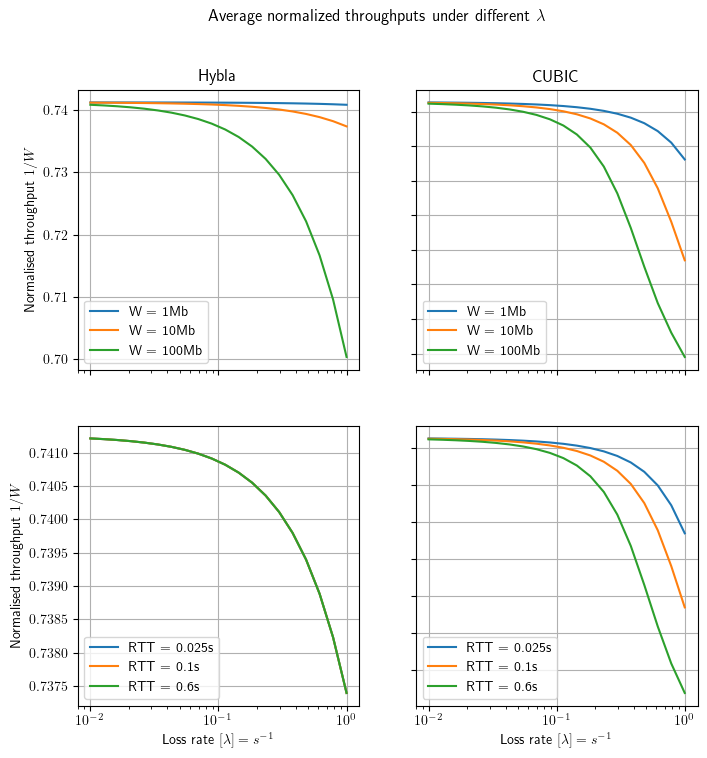

In [40]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Average normalized throughputs under different $\lambda$")
fig.set_figheight(8)
fig.set_figwidth(8)

axs[0, 0].plot(err_rates, throughputs_hybla_bandwidth[0,:],label = "W = 1Mb")
axs[0,0].plot(err_rates,throughputs_hybla_bandwidth[1,:], label = "W = 10Mb")
axs[0,0].plot(err_rates,throughputs_hybla_bandwidth[2,:], label = "W = 100Mb")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla")

axs[0,1].plot(err_rates, throughputs_cubic_bandwidth[0,:],label = "W = 1Mb")
axs[0,1].plot(err_rates,throughputs_cubic_bandwidth[1,:], label = "W = 10Mb")
axs[0,1].plot(err_rates,throughputs_cubic_bandwidth[2,:], label = "W = 100Mb")
axs[0,1].semilogx()
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC")

axs[1,0].plot(err_rates, throughputs_hybla_rtt[0,:],label = "RTT = 0.025s")
axs[1,0].plot(err_rates,throughputs_hybla_rtt[1,:], label = "RTT = 0.1s")
axs[1,0].plot(err_rates,throughputs_hybla_rtt[2,:], label = "RTT = 0.6s")
axs[1,0].semilogx()
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].plot(err_rates, throughputs_cubic_rtt[0,:],label = "RTT = 0.025s")
axs[1,1].plot(err_rates,throughputs_cubic_rtt[1,:], label = "RTT = 0.1s")
axs[1,1].plot(err_rates,throughputs_cubic_rtt[2,:], label = "RTT = 0.6s")
axs[1,1].semilogx()
axs[1,1].legend()
axs[1,1].grid()

for ax in axs.flat:
    ax.set(xlabel=r"Loss rate $[\lambda] = s^{-1}$", ylabel=r'Normalised throughput $1/W$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## CUBIC New

## Hybla New

## Concatenation
We want to concatenate the different models.
For example:

Client---[CG]--(RTT:1ms, p = 0.0000001)----Gateway-----------[SAT]---(RTT: 500ms, p=0.0005)----------Terminal----[TS]---(RTT: 25ms, p = 0.0000001)-------Server

vs 

Client---[CS]--(RTT: 526ms,p=0.0005)-------Server

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging, sys
from ccaModels import CCA_MarkovChain_CUBIC_OG, CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_Hybla_OG, CCA_MarkovChain_CUBIC_discrete
from ccaModels import ISP_Compound

In [3]:
C = 1000
# goodput ratio on the qpep link
goodputRatio = 0.9
logging.basicConfig(stream=sys.stderr, level=logging.INFO)

# CG = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.01,packet_err = 1e-6)
# SAT = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.5,packet_err = 1e-4)
# TS = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.025, packet_err = 1e-6)

CG = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.01,packet_err = 1e-6)
SAT = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.5,packet_err = 1e-4)
TS = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.025, packet_err = 1e-6)

segmented = ISP_Compound(CG=CG,SAT = SAT,TS = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_throughput()
print("Bottleneck link and throughput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
#Full connection
CS = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.535, packet_err = 1.02e-4)
direct = ISP_Compound(CS = CS)
print(direct)
direct.compute_throughput()
print("Bottleneck link and throughput",direct.bottleNeck,direct.min_throughput)
print("Goodput",direct.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", direct.time_to_transfer(filesize=1000))

Client X-----CG: CUBIC-----X-----SAT: CUBIC-----X-----TS: CUBIC-----X Server
Bottleneck link and throughput SAT 732.0206597774844
Goodput 658.8185937997359
Time to transfer a 1000MSS file (1Mbyte) 1.5178685140510386
_______________________________________________________________
Client X-----CS: CUBIC-----X Server
Bottleneck link and throughput CS 726.0215934302411
Goodput 726.0215934302411
Time to transfer a 1000MSS file (1Mbyte) 1.3773695011952614
